<a href="https://colab.research.google.com/github/saralieber/CS_Studio/blob/master/Reddit_WhatCausesYouToShop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping

In [12]:
pip install praw

In [0]:
import praw
import pandas as pd

my_client_id = 'Jbow2fXurn00og'
my_client_secret = 'OqTPW2Bo1sMKmZurQ2LpOZLAkjc'
my_user_agent = 'scrapescrape'

reddit = praw.Reddit(client_id=my_client_id, client_secret=my_client_secret, user_agent=my_user_agent)

In [0]:
url = reddit.submission(url="https://www.reddit.com/r/femalefashionadvice/comments/f3bmf0/ffa_lowno_buy_week_7_what_causes_you_to_shop/")

from praw.models import MoreComments

for top_level_comment in url.comments:
  if isinstance(top_level_comment, MoreComments):
    continue

comments = []

url.comments.replace_more(limit=0)
for top_level_comment in url.comments:
  comments.append(top_level_comment.body)
  # print(top_level_comment.body)

# String Cleaning

In [0]:
str_comments = str(comments)

In [0]:
str_comments = str_comments.replace(",","")
str_comments = str_comments.replace(".","")
str_comments = str_comments.replace('"',"")
str_comments = str_comments.replace("’","")
str_comments = str_comments.replace("(","")
str_comments = str_comments.replace(")","")
str_comments = str_comments.replace("'","")

# Text Analysis

In [17]:
import nltk
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.tokenize import sent_tokenize # tokenizes text into sentences
from nltk.tokenize import word_tokenize # tokenizes text into words
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer # Lemmatizing
lem = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer # stemming
stem = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
tokenized_text = word_tokenize(str_comments)
tokenized_text[:20]

['[',
 'I',
 'shop',
 'when',
 'Im',
 'bored',
 'sad',
 'and',
 'feel',
 'fat',
 'Im',
 'having',
 'difficulties',
 'with',
 'finding',
 'other',
 'things',
 'to',
 'do',
 'since']

In [19]:
# Word list of most common words
fdist = FreqDist(tokenized_text)
fdist.most_common(10)

[('I', 444),
 ('to', 238),
 ('and', 189),
 ('a', 182),
 ('the', 168),
 ('of', 128),
 ('my', 119),
 ('that', 90),
 ('in', 76),
 ('it', 71)]

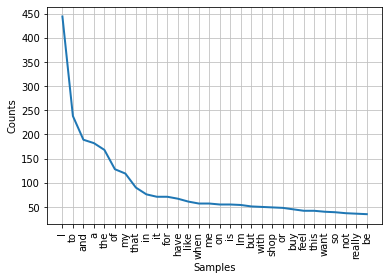

In [20]:
# Graph of most common words
fdist.plot(30, cumulative=False)
plt.show()

# More Text Cleaning

In [0]:
# Remove Stop Words
stop_words = set(stopwords.words("english"))

filtered_words = []

for w in tokenized_text:
  if w not in stop_words:
    filtered_words.append(w)

In [23]:
# Re-perform Frequency Analysis
fdist = FreqDist(filtered_words)
fdist.most_common(30)

[('I', 444),
 ('like', 61),
 ('Im', 54),
 ('shop', 49),
 ('buy', 45),
 ('feel', 42),
 ('want', 40),
 ('really', 36),
 ('clothes', 34),
 ('I\\m', 32),
 ('need', 31),
 ('shopping', 29),
 ('new', 29),
 ('something', 27),
 ('get', 26),
 ('things', 24),
 ('work', 23),
 ('Ive', 23),
 ('one', 23),
 ('trying', 21),
 ('item', 21),
 ('good', 20),
 ('also', 18),
 ('wardrobe', 18),
 ('time', 18),
 ('dont', 18),
 ('bored', 17),
 ('go', 17),
 ('?', 17),
 ('money', 17)]

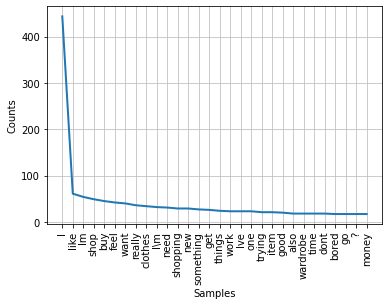

In [24]:
fdist.plot(30, cumulative=False)
plt.show()

In [0]:
# Part-of-speech Tagging and Lemmatization

nltk.pos_tag(filtered_words)

lemma_words = []

for word, tag in nltk.pos_tag(filtered_words):
  wtag = tag[0].lower()
  wtag = wtag if wtag in ['a', 'r', 'n', 'v'] else None 
  if not wtag:
    lemma = word
  else:
    lemma = lem.lemmatize(word, wtag)
  lemma_words.append(lemma)
  print(lemma)

In [0]:
# Frequency Analysis
fdist = FreqDist(lemma_words)
fdist.most_common(100)
fdist.plot(30, cumulative=False)
plt.show()